Mounted at /content/drive
=== GROWTH DIRECTION MODEL ===
              precision    recall  f1-score   support

           0       0.52      0.50      0.51      2638
           1       0.51      0.53      0.52      2556

    accuracy                           0.51      5194
   macro avg       0.51      0.51      0.51      5194
weighted avg       0.51      0.51      0.51      5194

ROC AUC: 0.5256703963143701

=== GROWTH MAGNITUDE MODEL ===
              precision    recall  f1-score   support

           0       0.82      0.74      0.78      2616
           1       0.76      0.84      0.80      2578

    accuracy                           0.79      5194
   macro avg       0.79      0.79      0.79      5194
weighted avg       0.79      0.79      0.79      5194

ROC AUC: 0.869497814962171


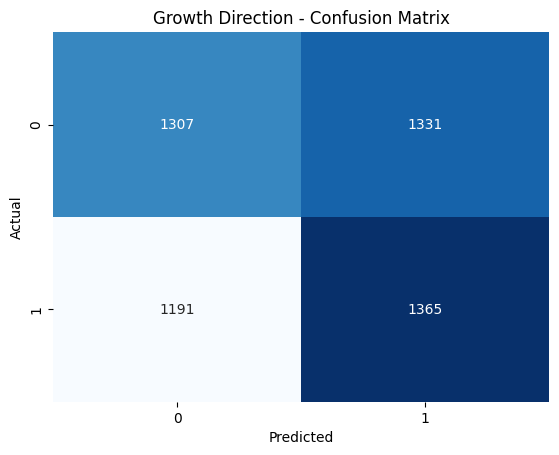

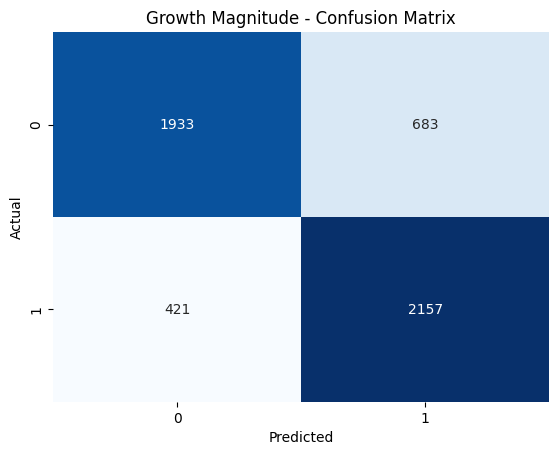

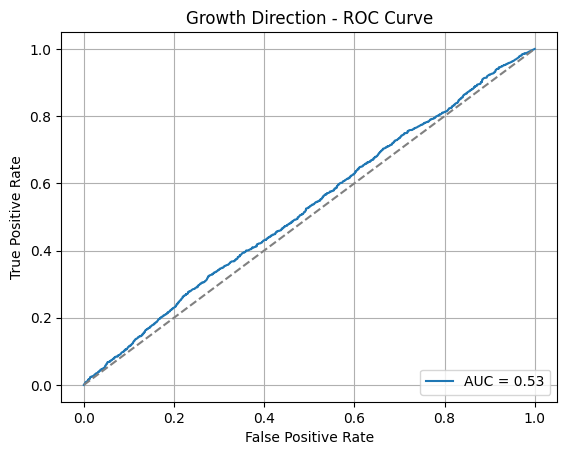

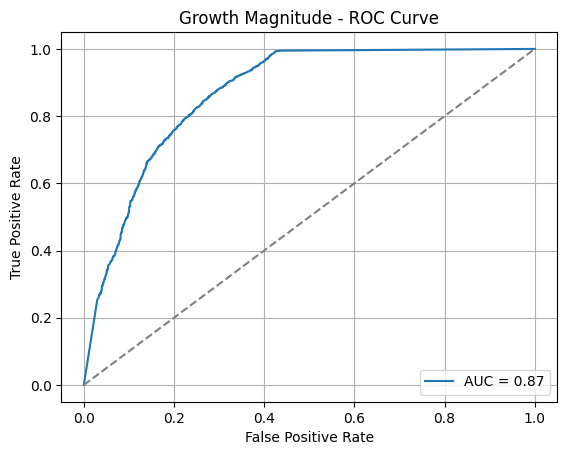

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import (
    classification_report, roc_auc_score, confusion_matrix,
    roc_curve, auc
)

# === Load and reshape data ===
file_path = "/content/drive/MyDrive/CSC442 Team Project/Output/world_combined/final_data_cleaned.csv"
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])
df['DayOfYear'] = df['Date'].dt.dayofyear

# Extract markets (columns ending in "Growth")
market_columns = [col for col in df.columns if col.endswith("Growth") and not col.startswith("Unnamed")]

# Reshape to long format
long_df = pd.melt(
    df,
    id_vars=['DayOfYear'],
    value_vars=market_columns,
    var_name='Market',
    value_name='Growth'
)
long_df['Market'] = long_df['Market'].str.replace(" Growth", "")

# === Create binary targets ===
long_df['Direction'] = (long_df['Growth'] >= 0).astype(int)
long_df['Magnitude'] = (long_df['Growth'].abs() >= long_df['Growth'].abs().median()).astype(int)

# === One-hot encode categorical feature ===
X = long_df[['DayOfYear', 'Market']]
y_dir = long_df['Direction']
y_mag = long_df['Magnitude']

encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = encoder.fit_transform(X)

# === Train/test split ===
X_train, X_test, y_train_dir, y_test_dir = train_test_split(X_encoded, y_dir, test_size=0.2, random_state=42)
_, _, y_train_mag, y_test_mag = train_test_split(X_encoded, y_mag, test_size=0.2, random_state=42)

# === Train Random Forest Classifiers ===
rf_dir = RandomForestClassifier(n_estimators=100, random_state=42)
rf_dir.fit(X_train, y_train_dir)

rf_mag = RandomForestClassifier(n_estimators=100, random_state=42)
rf_mag.fit(X_train, y_train_mag)

# === Evaluate the models ===
y_pred_dir = rf_dir.predict(X_test)
y_pred_mag = rf_mag.predict(X_test)

y_proba_dir = rf_dir.predict_proba(X_test)[:, 1]
y_proba_mag = rf_mag.predict_proba(X_test)[:, 1]

print("=== GROWTH DIRECTION MODEL ===")
print(classification_report(y_test_dir, y_pred_dir))
print("ROC AUC:", roc_auc_score(y_test_dir, y_proba_dir))

print("\n=== GROWTH MAGNITUDE MODEL ===")
print(classification_report(y_test_mag, y_pred_mag))
print("ROC AUC:", roc_auc_score(y_test_mag, y_proba_mag))

# === Visualization ===
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{title} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

def plot_roc_curve(y_true, y_proba, title):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.title(f"{title} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# Run visualizations
plot_confusion_matrix(y_test_dir, y_pred_dir, "Growth Direction")
plot_confusion_matrix(y_test_mag, y_pred_mag, "Growth Magnitude")

plot_roc_curve(y_test_dir, y_proba_dir, "Growth Direction")
plot_roc_curve(y_test_mag, y_proba_mag, "Growth Magnitude")

**THIS CODE BELOW WILL NOT RUN IN COLLAB**
It uses GridSearchCV to tune parameters and the runtime becomes to long to run in Collab. I ran this code as a .py file using the terminal on my computer with the required development environment setup.

In [ ]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import (
    classification_report, roc_auc_score, confusion_matrix,
    roc_curve, auc, precision_score
)

# === Load and reshape data ===
print("Loading and reshaping data...", flush=True)
file_path = "C:/Users/kings/Downloads/final_data_cleaned.csv"
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])
df['DayOfYear'] = df['Date'].dt.dayofyear

market_columns = [col for col in df.columns if col.endswith("Growth") and not col.startswith("Unnamed")]

long_df = pd.melt(
    df,
    id_vars=['DayOfYear'],
    value_vars=market_columns,
    var_name='Market',
    value_name='Growth'
)
long_df['Market'] = long_df['Market'].str.replace(" Growth", "")

# === Create binary targets ===
print("Creating target variables...", flush=True)
long_df['Direction'] = (long_df['Growth'] >= 0).astype(int)
long_df['Magnitude'] = (long_df['Growth'].abs() >= long_df['Growth'].abs().median()).astype(int)

# === Encode features ===
print("Encoding features...", flush=True)
X = long_df[['DayOfYear', 'Market']]
y_dir = long_df['Direction']
y_mag = long_df['Magnitude']

encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = encoder.fit_transform(X)

# === Split data ===
print("Splitting data into training and testing sets...", flush=True)
X_train, X_test, y_train_dir, y_test_dir = train_test_split(X_encoded, y_dir, test_size=0.2, random_state=42)
_, _, y_train_mag, y_test_mag = train_test_split(X_encoded, y_mag, test_size=0.2, random_state=42)

# === Hyperparameter Tuning ===
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

print("Starting GridSearchCV for Growth Direction model...", flush=True)
grid_dir = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=3
)
grid_dir.fit(X_train, y_train_dir)
print("Finished fitting Growth Direction model.\n", flush=True)
rf_dir = grid_dir.best_estimator_

print("Starting GridSearchCV for Growth Magnitude model...", flush=True)
grid_mag = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=3
)
grid_mag.fit(X_train, y_train_mag)
print("Finished fitting Growth Magnitude model.\n", flush=True)
rf_mag = grid_mag.best_estimator_

# === Evaluate Models ===
print("Evaluating models...", flush=True)
y_pred_dir = rf_dir.predict(X_test)
y_proba_dir = rf_dir.predict_proba(X_test)[:, 1]
y_pred_mag = rf_mag.predict(X_test)
y_proba_mag = rf_mag.predict_proba(X_test)[:, 1]

print("\n=== GROWTH DIRECTION MODEL ===", flush=True)
print("Best Params:", grid_dir.best_params_, flush=True)
print(classification_report(y_test_dir, y_pred_dir), flush=True)
print("ROC AUC:", roc_auc_score(y_test_dir, y_proba_dir), flush=True)

print("\n=== GROWTH MAGNITUDE MODEL ===", flush=True)
print("Best Params:", grid_mag.best_params_, flush=True)
print(classification_report(y_test_mag, y_pred_mag), flush=True)
print("ROC AUC:", roc_auc_score(y_test_mag, y_proba_mag), flush=True)

# === Plotting & Saving Results ===
def plot_confusion_matrix(y_true, y_pred, title, filename):
    print(f"Saving confusion matrix: {filename}", flush=True)
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{title} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.savefig(filename)
    plt.clf()

def plot_roc_curve(y_true, y_proba, title, filename):
    print(f"Saving ROC curve: {filename}", flush=True)
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.title(f"{title} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(filename)
    plt.clf()

# Save plots
plot_confusion_matrix(y_test_dir, y_pred_dir, "Growth Direction", "confusion_direction.png")
plot_confusion_matrix(y_test_mag, y_pred_mag, "Growth Magnitude", "confusion_magnitude.png")
plot_roc_curve(y_test_dir, y_proba_dir, "Growth Direction", "roc_direction.png")
plot_roc_curve(y_test_mag, y_proba_mag, "Growth Magnitude", "roc_magnitude.png")

print("All evaluations and plots completed successfully.", flush=True)

Mounted at /content/drive
Fitting 5 folds for each of 24 candidates, totalling 120 fits


KeyboardInterrupt: 

**Ouputs added manually from python plot outputs from terminal.**

### Growth Direction Model
**Best Params:**  
`{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}`

                     precision    recall  f1-score   support

              0       0.56      0.13      0.21      2638
              1       0.50      0.90      0.64      2556
       accuracy                           0.51      5194
       macro avg      0.53      0.51      0.42      5194
       weighted avg   0.53      0.51      0.42      5194

**ROC AUC:** `0.5478`


---

### Growth Magnitude Model

**Best Params:**  
`{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}`

                 precision    recall  f1-score   support

            0       0.82      0.74      0.78      2616
            1       0.76      0.83      0.79      2578
       accuracy                         0.79      5194
       macro avg    0.79      0.79      0.79      5194
       weighted avg 0.79      0.79      0.79      5194

**ROC AUC:** `0.8718`



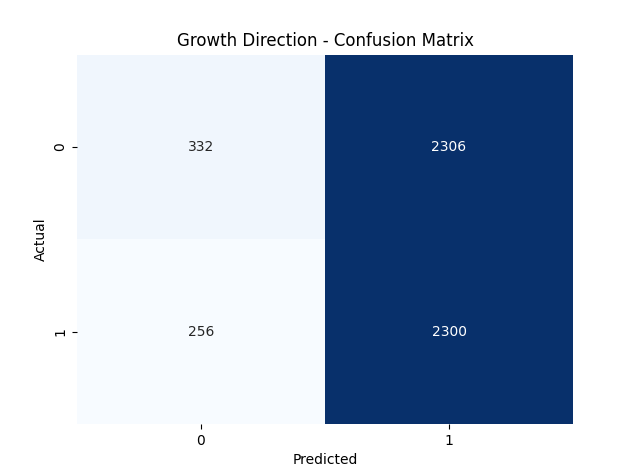

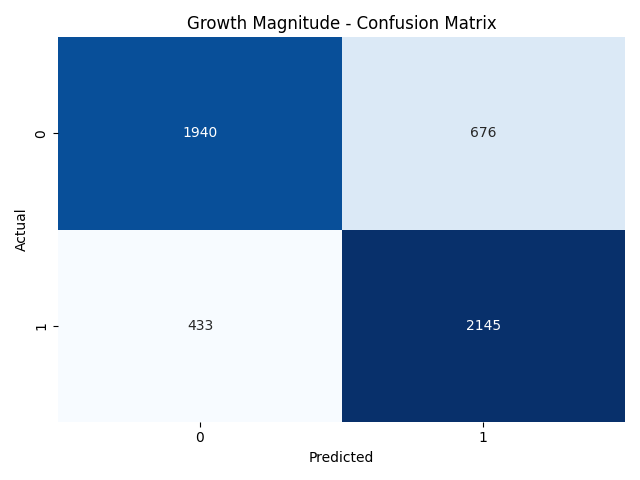

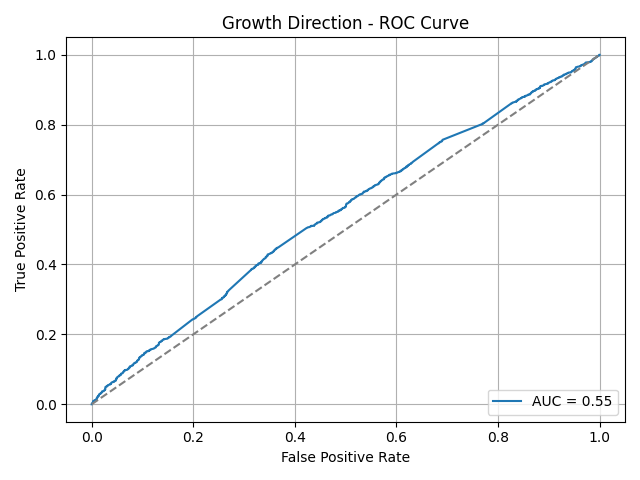

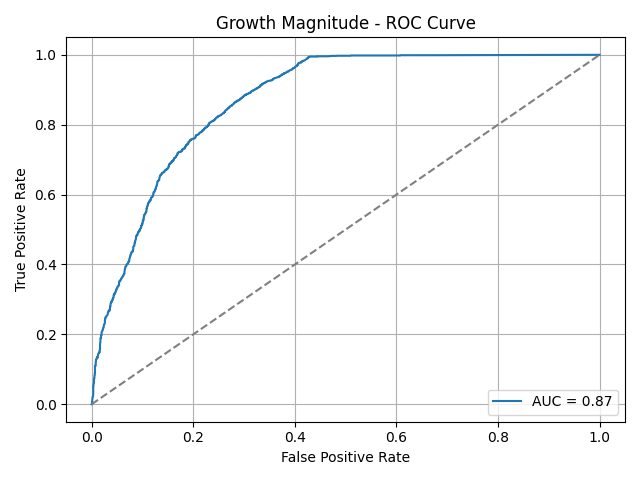